<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/ClusterQuest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Name:   Rajavel Sethupathi
###Email:  rajvel@gmail.com
### ClusterQuest - Unveiling Cohorts in Social Networks

###Facebook Graph Dataset

This notebook uses the dataset in the file called *facebook_combined.txt*.
Each line in the dataset denotes a connection between two users represented by corresponding user ids. For example, the following row denotes a connection between a user with user-id 1104 to a user with user-id 1404.

1104 1404

*You can create a graph out of the connections represented by this data.*
*If you observe closely in the data file, you will notice that there is no entry in the file for a connection from user 1404 to user 1104 (opposite of the row above). This is because in Facebook, a friendship is a two way connection, which means that two friends on Facebook always follow each other.*

In [2]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install networkx --upgrade

In [ ]:
!pip install matplotlib --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 14.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 

In [ ]:
!pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.0 MB/s eta 0:00:00


## Import the necessary modules

In [77]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


In [ ]:
from igraph import Graph
igraph_fb = Graph.Read('/content/drive/MyDrive/facebook_combined.txt', directed = False)

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a Graph Object
#
FBG =nx.read_edgelist("/content/drive/MyDrive/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [84]:
print("Number of Nodes (Vertices) in the cluster: ", FBG.number_of_nodes())
print("Number of Edges (Links) in the cluster: ", FBG.number_of_edges())

Number of Nodes (Vertices) in the cluster:  4039
Number of Edges (Links) in the cluster:  88234


## Simple drawing the graph with Matplotlib without labels or axes

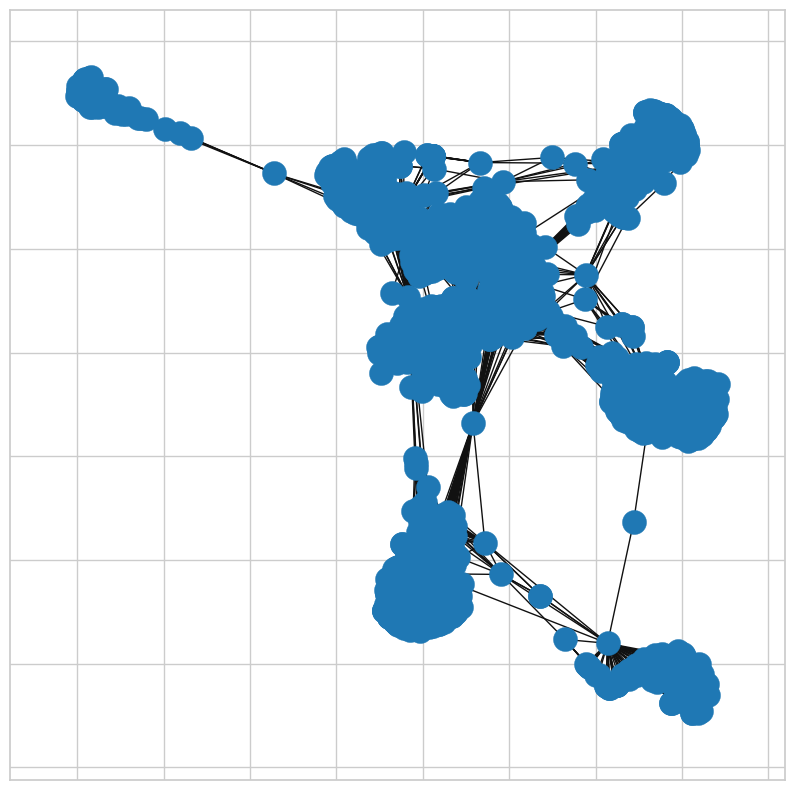

In [111]:
plt.figure(figsize=(10,10))
nx.draw_networkx(FBG, with_labels=False )


Social network analysis is a way to understand how networks behave, and uncover the most important nodes within them using the following features -

 *Degree Centrality, Betweenness Centrality, Closeness Centrality, PageRank Centrality, Eigen Centrality, kCores, and Distance/shortest path.*
Reference:  https://cambridge-intelligence.com/social-network-analysis/

**Degree Centrality** measure finds nodes with the highest number of links to other nodes in the network.

In [8]:
deg_centrality = nx.degree_centrality(FBG)
sorted_centralities = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_centralities)

[(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354), (2543, 0.07280832095096582), (2347, 0.07206537890044576), (1888, 0.0629024269440317), (1800, 0.06067360079247152), (1663, 0.058197127290737984), (1352, 0.05794947994056463), (2266, 0.05794947994056463), (483, 0.057206537890044575), (348, 0.05671124318969787), (1730, 0.055968301139177806), (1985, 0.0554730064388311), (1941, 0.05522535908865775), (2233, 0.0549777117384844), (2142, 0.054730064388311045), (1431, 0.05448241703813769), (1199, 0.05373947498761763), (1584, 0.05225359088657751), (2206, 0.052005943536404156), (1768, 0.051758296186230804), (2229, 0.0512630014858841), (2410, 0.0512630014858841), (2611, 0.0512630014858841), (1086, 0.050767706785537395), (1589, 0.050767706785537395), (2047, 0.050767706785537395), (2218, 0.050767706785537395), (2078, 0.05052005943536404), (1993, 0.05027241208519068), (2123, 0.05027241208519068), (1746, 0.050024764

In [113]:
# to see the number of neighbors for the nodes with the highest degree centralities
#
(sorted(FBG.degree, key=lambda item:item[1], reverse=True))[:8]

[(107, 1045),
 (1684, 792),
 (1912, 755),
 (3437, 547),
 (0, 347),
 (2543, 294),
 (2347, 291),
 (1888, 254)]

Text(0, 0.5, 'Counts')

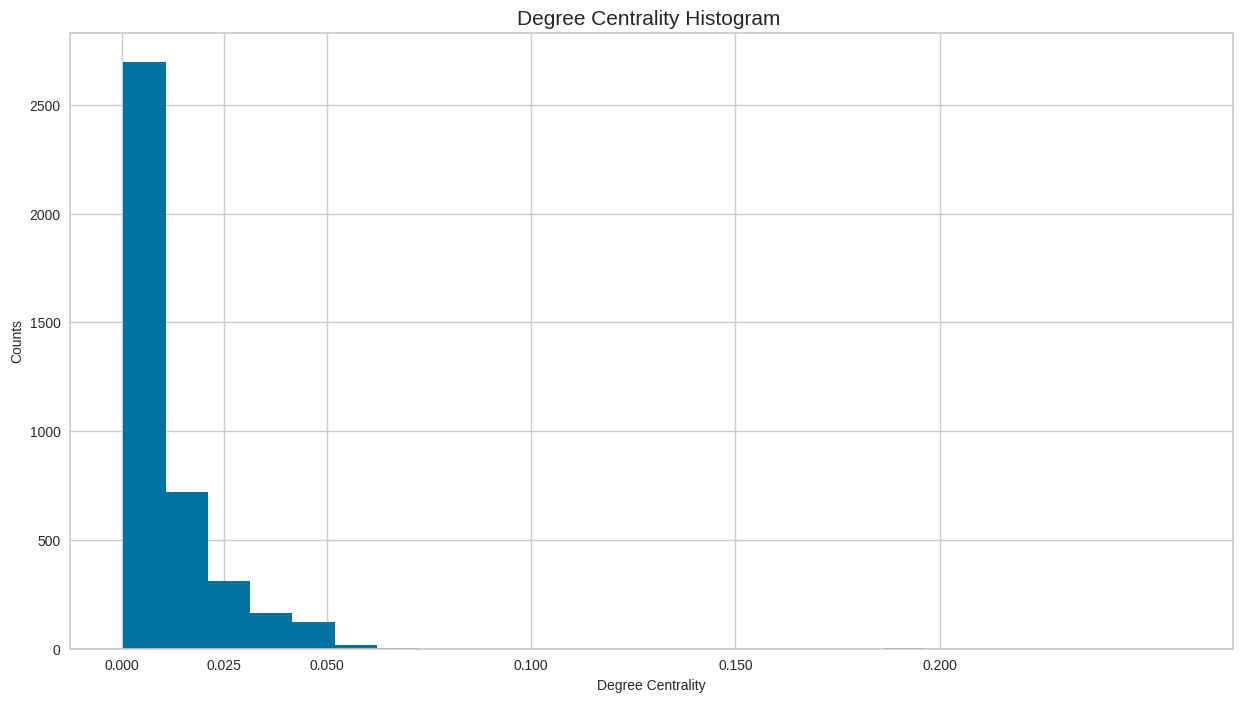

In [114]:
# plotting the distribution of degree centralities
plt.figure(figsize=(15, 8))
plt.hist(deg_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])  # set the x axis ticks
plt.title("Degree Centrality Histogram ", fontdict={"size": 15}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 10})
plt.ylabel("Counts", fontdict={"size": 10})

**Betweenness Centrality** measure find nodes that most frequently act as 'bridges' between other nodes, which form the shortest path of communication within the network.

In [115]:
bet_centrality = nx.betweenness_centrality(FBG, normalized=True, endpoints=True)
(sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True))[:5]


[(107, 0.48077531149557645),
 (1684, 0.33812535393929544),
 (3437, 0.23649361170042005),
 (1912, 0.22967697101070242),
 (1085, 0.14943647607698152)]

From above, nodes 107, 1684, 3437 , 1912 indicate important gatekeepers of information between groups. Node 107 lies on almost half of the total shortest paths between other nodes.

**Closeness Centrality** measure find nodes that are closest to other nodes in the network, based on their ability to reach them.

In [116]:
clse_centrality = nx.closeness_centrality(FBG)
sorted_clscen = sorted(clse_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_clscen)

[(107, 0.45969945355191255), (58, 0.3974018305284913), (428, 0.3948371956585509), (563, 0.3939127889961955), (1684, 0.39360561458231796), (171, 0.37049270575282134), (348, 0.36991572004397216), (483, 0.3698479575013739), (414, 0.3695433330282786), (376, 0.36655773420479304), (475, 0.3661920740001814), (566, 0.36496746203904556), (1666, 0.3647037572254335), (1534, 0.36460496613995486), (484, 0.3631621548700423), (353, 0.36309684380901), (1171, 0.3624450228884301), (651, 0.36228243315987796), (420, 0.3610192221725525), (1085, 0.35785182559376105), (1687, 0.35725028753428295), (1577, 0.35718708536045995), (1718, 0.3566507684154743), (1165, 0.3564933345104617), (1136, 0.3563045971940351), (1465, 0.35461491174145954), (0, 0.35334266713335666), (1912, 0.35094733182687293), (580, 0.34503973340169186), (1505, 0.34275528393175453), (1405, 0.3424936386768448), (1656, 0.3420294765373539), (990, 0.34188468376936754), (1642, 0.3418557399254995), (1758, 0.341826800981969), (1419, 0.3417400135409614)

**PageRank Centrality** identifies important nodes by assigning each a score based on incoming links ('indegree'). These links are weighted depending on the relative score of originating node.

In [117]:
pgrnk_centrality = nx.pagerank(FBG)
sorted_pgrnkcen = sorted(pgrnk_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_pgrnkcen)

[(3437, 0.0076145868447496), (107, 0.006936420955866117), (1684, 0.006367162138306824), (0, 0.006289602618466542), (1912, 0.003876971600884498), (348, 0.002348096972780577), (686, 0.002219359259800019), (3980, 0.0021703235790099928), (414, 0.001800299047070226), (698, 0.0013171153138368812), (483, 0.0012974283300616095), (3830, 0.0011844348977671697), (376, 0.0009014073664792465), (2047, 0.0008410291545974014), (56, 0.0008039024292749443), (25, 0.0008004126605197681), (828, 0.0007886905420662137), (322, 0.0007867992190291398), (475, 0.0007853586142469625), (428, 0.0007800171933479687), (67, 0.0007724556453836683), (3596, 0.0007657185486816221), (2313, 0.0007541077515661331), (713, 0.0007493481050218993), (271, 0.0007457889296014826), (563, 0.0007402839803830181), (917, 0.0007331559412352087), (119, 0.0007319072593209059), (3545, 0.0007271573982528108), (3938, 0.000726601468756114), (277, 0.0007191102550992674), (1888, 0.0007117172673725062), (1800, 0.0006984646532952213), (3604, 0.0006

**Distance / shortest path** measures the number of hops apart two nodes in the network.

In [118]:
source_node = 3437
hops = 2

spd_measure = nx.single_source_shortest_path_length(FBG, source_node, cutoff=hops)
print(spd_measure)


{3437: 0, 567: 1, 698: 1, 857: 1, 862: 1, 1085: 1, 3438: 1, 3439: 1, 3440: 1, 3441: 1, 3442: 1, 3443: 1, 3444: 1, 3445: 1, 3446: 1, 3447: 1, 3448: 1, 3449: 1, 3450: 1, 3451: 1, 3452: 1, 3453: 1, 3454: 1, 3455: 1, 3456: 1, 3457: 1, 3458: 1, 3459: 1, 3460: 1, 3461: 1, 3462: 1, 3463: 1, 3464: 1, 3465: 1, 3466: 1, 3467: 1, 3468: 1, 3469: 1, 3470: 1, 3471: 1, 3472: 1, 3473: 1, 3474: 1, 3475: 1, 3476: 1, 3477: 1, 3478: 1, 3479: 1, 3480: 1, 3481: 1, 3482: 1, 3483: 1, 3484: 1, 3485: 1, 3486: 1, 3487: 1, 3488: 1, 3489: 1, 3490: 1, 3491: 1, 3492: 1, 3493: 1, 3494: 1, 3495: 1, 3496: 1, 3497: 1, 3498: 1, 3499: 1, 3500: 1, 3501: 1, 3502: 1, 3503: 1, 3504: 1, 3505: 1, 3506: 1, 3507: 1, 3508: 1, 3509: 1, 3510: 1, 3511: 1, 3512: 1, 3513: 1, 3514: 1, 3515: 1, 3516: 1, 3517: 1, 3518: 1, 3519: 1, 3520: 1, 3521: 1, 3522: 1, 3523: 1, 3524: 1, 3525: 1, 3526: 1, 3527: 1, 3528: 1, 3529: 1, 3530: 1, 3531: 1, 3532: 1, 3533: 1, 3534: 1, 3535: 1, 3536: 1, 3537: 1, 3538: 1, 3539: 1, 3540: 1, 3541: 1, 3542: 1, 3543

### Few observations per below -
 - a node is connected to almost ~44 other nodes (neighbors)...

In [119]:
np.mean([d for _, d in FBG.degree()])

43.69101262688784

In [120]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(FBG))

- As can be seen below, in order to connect from one node to any other, will have to traverse 8 edges or fewer!

In [121]:
diameter = max(nx.eccentricity(FBG, sp=shortest_path_lengths).values())
print(diameter)

8


- So it takes roughly ~3.6 edges will be traversed on average as noted below ....

In [122]:
# Compute the average shortest path length for each node
average_path_lengths = [np.mean(list(spl.values())) for spl in shortest_path_lengths.values()]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

## **Clustering Effects**

The **clustering coefficient of a node**  is defined as the probability that two randomly selected friends of  are friends with each other. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes.  
The closer the average clustering coefficient is to 1, the more complete the graph will be because there’s just one giant component. Lastly, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually arise.

In [123]:
#average clustering
#
nx.average_clustering(FBG)

0.6055467186200876

Text(0, 0.5, 'Counts')

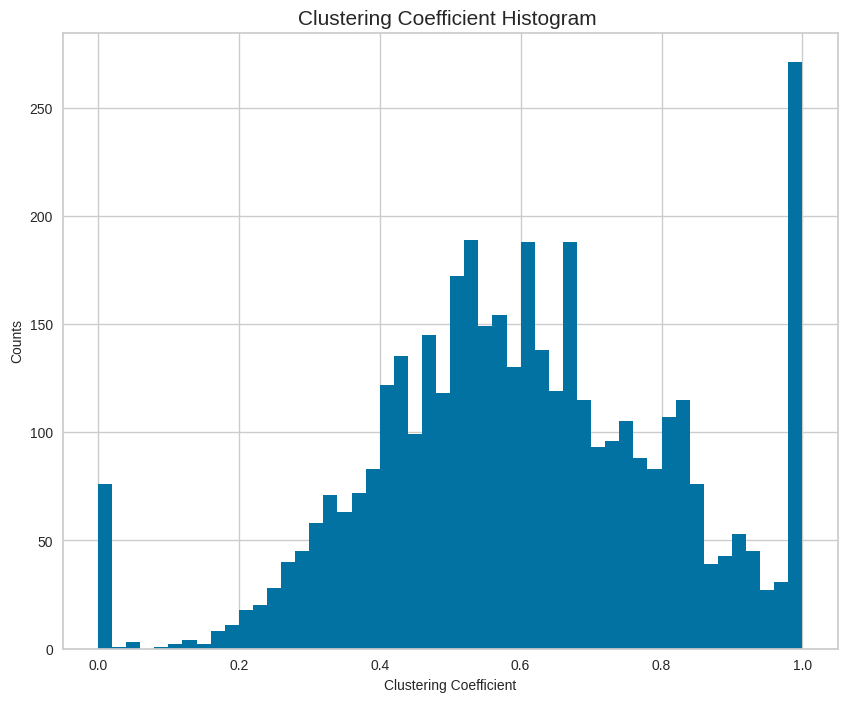

In [124]:
# plot of clustering coefficient
#
plt.figure(figsize=(10, 8))
plt.hist(nx.clustering(FBG).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 15}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 10})
plt.ylabel("Counts", fontdict={"size": 10})

Per above plot, it can be seen the bins of clustering coefficient between 0.4 and 0.8 contain the majority of nodes thus far.

In [6]:
# triangles in the network with each triangle counted once for each node
# given the number of triangles, signifies a triadic closure
#
triangles_per_node = list(nx.triangles(FBG).values())
print("Number of Unique Triangles: ", sum(triangles_per_node) / 3)
print("")
print("Median number of triangles that a node is part of: ", np.median(triangles_per_node))


Number of Unique Triangles:  1612010.0

Median number of triangles that a node is part of:  161.0


In summary, the high average clustering coefficient together with the huge number of triangles are signs of the triadic closure. In detail, the triadic closure means that as time goes on, new edges tend to form between two users that have one or more mutual friends.

Now considering the clustering coefficient with the centrality measure ..


In [9]:
sdeg_cent = sorted(list(deg_centrality.values()),reverse=True)
clustering_coef = nx.clustering(FBG)
sclcoef = list(clustering_coef.values())
X = np.column_stack((sdeg_cent, sclcoef))
print(X.shape)
print(X[0:10])

(4039, 2)
[[0.25879148 0.04196165]
 [0.1961367  0.41911765]
 [0.18697375 0.88888889]
 [0.1354631  0.63235294]
 [0.08593363 0.86666667]
 [0.07280832 0.33333333]
 [0.07206538 0.93333333]
 [0.06290243 0.43157895]
 [0.0606736  0.67857143]
 [0.05819713 0.39724311]]


Applying the Normalization

In [10]:
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled.shape)
print(X_scaled[0:10])

(4039, 2)
[[19.10380394 -2.62822483]
 [14.27685995 -0.86939407]
 [13.57094324  1.321339  ]
 [ 9.6025466   0.12500824]
 [ 5.7867806   1.2177078 ]
 [ 4.77560262 -1.26944098]
 [ 4.71836613  1.5286014 ]
 [ 4.01244942 -0.81128199]
 [ 3.84073995  0.34054372]
 [ 3.64995165 -0.97140388]]


**Clustering**: Apply clustering algorithms to group nodes based on their shared structural properties, by applying the techniques -

k-means (Lloyd’s algorithm), agglomerative clustering (hclust), and DBSCAN.

**Evaluation**: Assess the quality of the generated clusters by employing the evaluation metrics -

**Silhouette score** is higher when clusters are dense and well separated, which relates to a standard concept of a cluster -generally indicate better clustering quality.

The **Calinski-Harabasz index** also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.


**Davies-Bouldin index** signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. A lower Davies-Bouldin index relates to a model with better separation between the clusters.

In [14]:
# Applying the KMeans algorithm along with the evaluation metrics
# kmeans algorithm fits to the X dataset
# kmeans inertia_ attribute is:  Sum of squared distances of samples to their closest cluster center.

sse = []
silhouette_scores_kmeans = []
db_scores_kmeans = []
calinski_harabasz_score_kmeans = []

trial_num_clusters = [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for num_clusters in trial_num_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=500)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

    silhouette_scores_kmeans.append(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))
    db_scores_kmeans.append(davies_bouldin_score(X_scaled, kmeans.labels_))
    calinski_harabasz_score_kmeans.append(calinski_harabasz_score(X_scaled, kmeans.labels_))



In [15]:
def score(X, n_clusters):
    model = KMeans(n_init="auto", n_clusters=n_clusters, random_state=1)
    model.fit(X)
    predicted = model.predict(X)
    return {
        "n_clusters": n_clusters,
        "silhouette_score": metrics.silhouette_score(X, predicted),
        "calinski_harabasz_score": metrics.calinski_harabasz_score(X, predicted),
        "davies_bouldin_score": metrics.davies_bouldin_score(X, predicted),
    }


df_metrics = pd.DataFrame(
    score(X_scaled, n_clusters) for n_clusters in (2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
)
df_metrics.set_index("n_clusters", inplace=True)

(
    df_metrics.style.highlight_max(
        subset=["silhouette_score", "calinski_harabasz_score"], color="lightgreen"
    ).highlight_min(subset=["davies_bouldin_score"], color="lightgreen")
)

,silhouette_score,calinski_harabasz_score,davies_bouldin_score
n_clusters,,,
2,0.356768,1880.443211,1.124861
3,0.418072,2679.178605,0.813813
4,0.368132,2479.928274,0.888312
5,0.326189,2144.030986,0.983889
6,0.395518,2378.496577,0.838965
7,0.370643,2312.258679,0.854374
8,0.375206,3080.814634,0.751700
9,0.376354,3024.550869,0.773713
10,0.379014,3013.811162,0.781325


The table above shows higher Silhouette Score when k=3 which would form distinct clusters. Additionally, higher Calinski-Harabasz Score and low Davies-Bouldin Index takes us to higher k values for better clustering quality. These metrics should be used in conjunction with domain knowledge and other evaluation methods to fully assess the quality of clustering results.

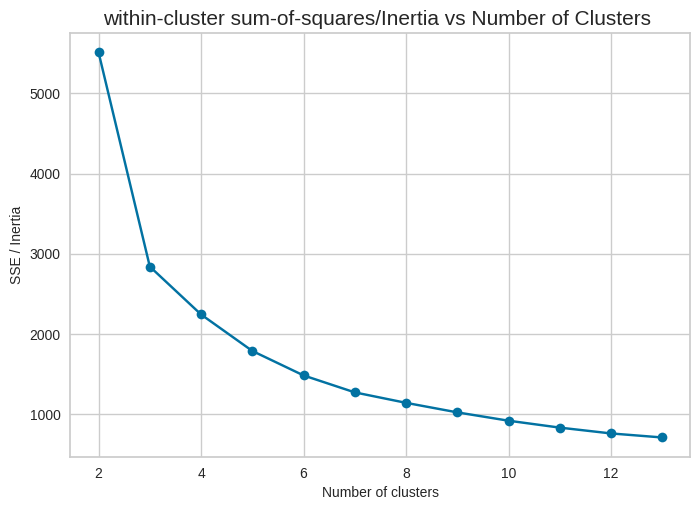

In [16]:
# plotting the elbow graph ..
#
x = np.array([i for i in range(2,14)])
plt.plot(x, sse, marker = 'o')
plt.title("within-cluster sum-of-squares/Inertia vs Number of Clusters ", fontdict={"size": 15}, loc="center")
plt.xlabel("Number of clusters", fontdict={"size": 10})
plt.ylabel("SSE / Inertia", fontdict={"size": 10})
plt.show()

In this plot, it appears that there is an elbow or "bend" at k=7 clusters. Hence, choosing k to be 7 for plot visualization.

Note: In the real-world, we shall be using a combination of this plot along with domain expertise to pick how many clusters to use.

### Visualize the cluster formed by KMeans algorithm..

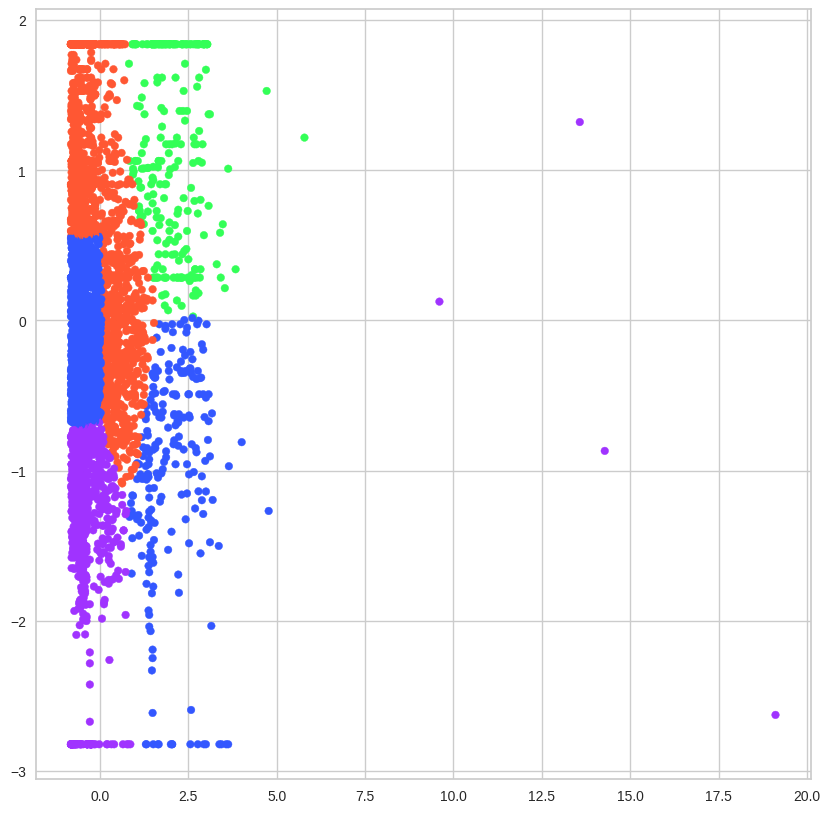

In [79]:
kmeans = KMeans(n_clusters=7)
xkfit = kmeans.fit(X_scaled)
# Define a custom colormap
colors = ['#FF5733', '#33FF57', '#3357FF', '#A033FF']  # Define colors for each cluster
cmap = ListedColormap(colors)

plt.figure(figsize =(10, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap=cmap, s=30)

The above plot shows 5 distinct clusters color coded accordingly. The left most 3 clusters that are stacked have low degree centrality, and are clustered according to their clustering coefficients.

# Applying the hclust algorithm along with the evaluation metrics


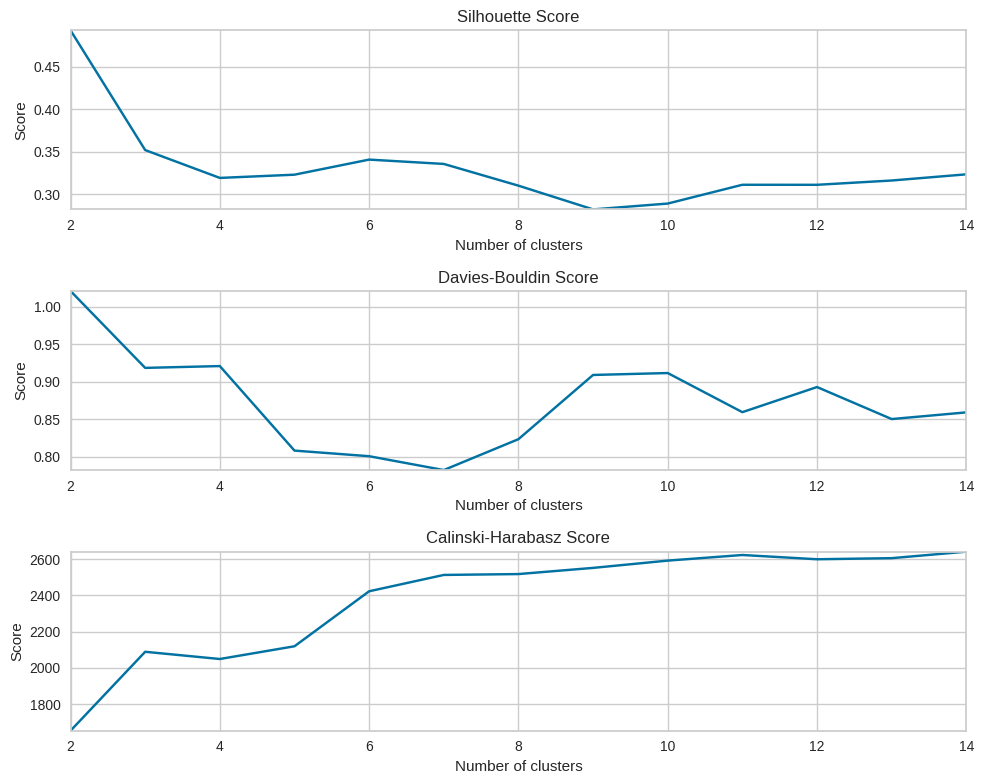

In [45]:
# hclust algorithm fits to the Xscaled dataset

silhouette_scores_agg = []
db_scores_agg = []
calinski_harabasz_agg = []

trial_num_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for num_clusters in trial_num_clusters:
    agg = AgglomerativeClustering(n_clusters = num_clusters).fit(X_scaled)

    silhouette_scores_agg.append(silhouette_score(X_scaled, agg.labels_, metric='euclidean'))
    db_scores_agg.append(davies_bouldin_score(X_scaled, agg.labels_))
    calinski_harabasz_agg.append(calinski_harabasz_score(X_scaled, agg.labels_))


# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plot Silhouette Score
axes[0].plot(trial_num_clusters, silhouette_scores_agg, label='Silhouette Score')
axes[0].set_title('Silhouette Score')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Score')
axes[0].grid(True)

# Plot Davies-Bouldin Score
axes[1].plot(trial_num_clusters, db_scores_agg, label='Davies-Bouldin Score')
axes[1].set_title('Davies-Bouldin Score')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Score')
axes[1].grid(True)

# Plot Calinski-Harabasz Score
axes[2].plot(trial_num_clusters, calinski_harabasz_agg, label='Calinski-Harabasz Score')
axes[2].set_title('Calinski-Harabasz Score')
axes[2].set_xlabel('Number of clusters')
axes[2].set_ylabel('Score')
axes[2].grid(True)

# Automatically adjust the axis limits based on the data for each subplot
for ax in axes:
    ax.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

From the above plots, Silhouette Score shows the clusters are well separated when k=2, Calinski-Harabasz Score with roughly k=7 indicates better clustering, which matches with Davies-Bouldin Index of k=7. Also we could note from Silhoutte and Dabies-Bouldin plots, the elbow can be noted at k=4. Looking at all 3 metrics, n_clusters = 7, seem to be better choice. However, it's important to note that these metrics should be used in conjunction with domain knowledge to fully assess the quality of clustering results.

[4 4 4 ... 3 2 2]


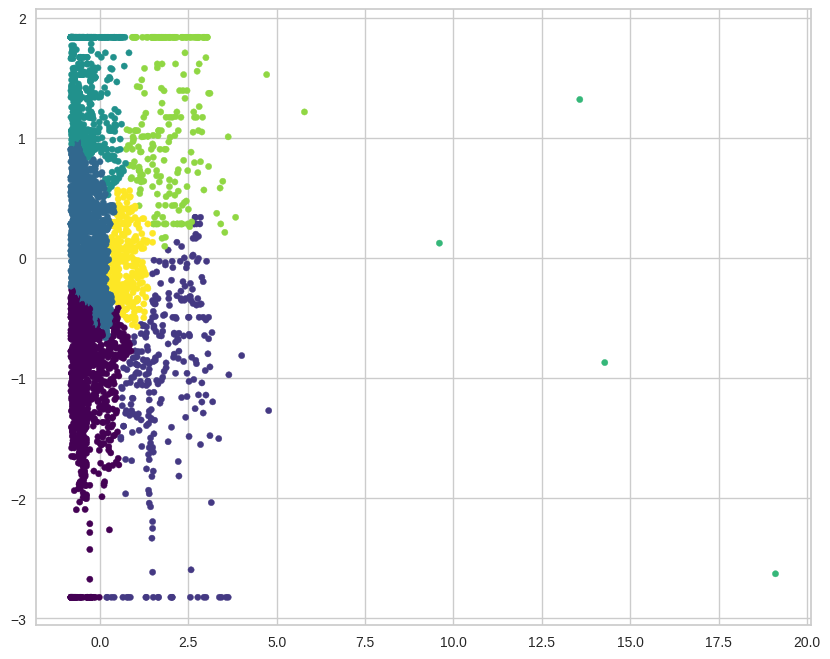

In [75]:
agg = AgglomerativeClustering(n_clusters = 7).fit(X_scaled)
print(agg.labels_)
plt.figure(figsize =(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg.labels_, cmap='viridis', s=20)

The above plot shows 7 distinct clusters color coded for identification. The left most 3 clusters that are stacked have low degree centrality, and are clustered according to their clustering coefficients.

# Applying the DBSCAN algorithm along with the evaluation metrics

    Epsilon  Min Samples  Silhouette Score  Davies-Bouldin Index  \
80      0.9           40          0.762619              0.857722   
81      0.9           50          0.737322              0.896657   
82      0.9           60          0.718324              0.888661   
83      0.9           70          0.708708              0.902175   
84      0.9           80          0.708708              0.902175   
85      0.9           90          0.692017              0.894250   
86      0.9          100          0.688853              0.885703   
87      0.9          110          0.667001              0.909439   
88      1.0           10          0.854288              0.518101   
89      1.0           20          0.841413              0.577198   

    Calinski-Harabasz Score  
80               362.544625  
81               353.039684  
82               364.417991  
83               360.992489  
84               360.992489  
85               384.893243  
86               391.177672  
87         

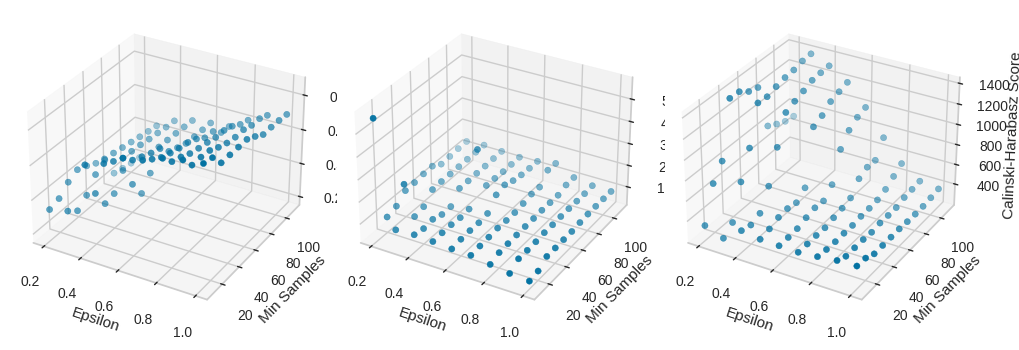

In [82]:
# Initialize lists to store results
epsilon_values = []
min_samples_values = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Define ranges for epsilon and minimum samples
epsilon_range = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

# Initialize lists to store results
results = []

# Iterate over parameter combinations
for epsilon in epsilon_range:
    for min_samples in min_samples_range:
        # Fit DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        dbscan.fit(X_scaled)
        labels = dbscan.labels_

        # Compute evaluation metrics
        silhouette = silhouette_score(X_scaled, labels)
        davies_bouldin = davies_bouldin_score(X_scaled, labels)
        calinski_harabasz = calinski_harabasz_score(X_scaled, labels)

       # Append results to list
        results.append([epsilon, min_samples, silhouette, davies_bouldin, calinski_harabasz])

        # Append results to lists
        epsilon_values.append(epsilon)
        min_samples_values.append(min_samples)
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)
        calinski_harabasz_scores.append(calinski_harabasz)

# Create a DataFrame to display results
df = pd.DataFrame(results, columns=['Epsilon', 'Min Samples', 'Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Score'])
# Display specific range of rows and columns
subset_df = df.iloc[80:90, :]
print(subset_df)


# Create 3D plots
fig = plt.figure(figsize=(10, 8))

# Silhouette Score
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(epsilon_values, min_samples_values, silhouette_scores)
ax1.set_xlabel('Epsilon')
ax1.set_ylabel('Min Samples')
ax1.set_zlabel('Silhouette Score')

# Davies-Bouldin Index
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(epsilon_values, min_samples_values, davies_bouldin_scores)
ax2.set_xlabel('Epsilon')
ax2.set_ylabel('Min Samples')
ax2.set_zlabel('Davies-Bouldin Index')

# Calinski-Harabasz Score
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(epsilon_values, min_samples_values, calinski_harabasz_scores)
ax3.set_xlabel('Epsilon')
ax3.set_ylabel('Min Samples')
ax3.set_zlabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

From the table and plots above, selecting the epsilon and min samples with high Silhoutte Scores and Calinski-Harabasz scores and low Davies-Bouldin index to get percentage metrics for the distinct cluster. This happens to be for epsilon =1.0 and min_samples = 10

In [83]:
dbscan = DBSCAN(eps = 1.0, min_samples=10)
dbscan_clusters = dbscan.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
db_score = davies_bouldin_score(X_scaled, dbscan.labels_)
ch_score = calinski_harabasz_score(X_scaled, dbscan.labels_)
print('Silhouette score = %f' % silhouette_avg)
print('DB index = %f' % db_score)
print('CH index = %f' % ch_score)
print('Total effective clusters (2 assigned + 1 unassinged) = %d' % len(np.unique(dbscan_clusters)))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

Silhouette score = 0.854288
DB index = 0.518101
CH index = 413.592917
Total effective clusters (2 assigned + 1 unassinged) = 2
Number of clusters: 1
Number of noise points: 6


As can be seen above, DBSCAN produces single cluster with less noise points, the rest unassigned. Like with other clustering techniques, domain knowledge should be factored in these metrics, to firm up the quality of clustering results.

# Future Work

The emergence of deep learning techniques has enabled to carry out a rigorous analysis of Online Social Networks (OSNs). A lot of research is being carried out in the area of social network analysis using deep learning techniques from different perspectives with a need to consider applications such as opinion analysis, sentiment analysis, text classification, recommender systems, structural analysis, anomaly detection, and fake news detection.

Here are few references that would assist with building deep learning models for unveiling cohorts in social networks.
https://computationalsocialnetworks.springeropen.com/articles/10.1186/s40649-019-0069-y#Sec27

https://www.researchgate.net/publication/340211747_Extracting_Actionable_Knowledge_From_Social_Networks_Using_Structural_Features

https://www.sciencedirect.com/science/article/abs/pii/S0378437119313597